# Problem Statement

JetRail is a new form of transportation. JetRail uses Jet propulsion technology to run rails and move people at a high speed! You are provided with traffic data of JetRail since inception. In order to efficiently manage the business and manpower for the coming months, it is crucial to estimate the expected traffic on JetRail. Your task is to use this data and forecast the traffic on JetRail for the next 7 months.

Data Description

Date: Store the date when the observation was taken
Count: Holds the number passengers for the given date

# Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.metrics import mean_squared_log_error
from math import sqrt
from statistics import mean 

import warnings
warnings.filterwarnings("ignore")

In [2]:
train_data = pd.read_csv("data/train_data.csv")
valid_data = pd.read_csv("data/valid_data.csv")

In [3]:
print(train_data.shape)
train_data.head()

(578, 2)


,Date,count
0,2012-08-25,3
1,2012-08-26,3
2,2012-08-27,2
3,2012-08-28,2
4,2012-08-29,2


# Required Preprocessing 

In [4]:
train_data.timestamp = pd.to_datetime(train_data['Date'],format='%Y-%m-%d')
train_data.index = train_data.timestamp

In [5]:
valid_data.timestamp = pd.to_datetime(valid_data['Date'],format='%Y-%m-%d')
valid_data.index = valid_data.timestamp

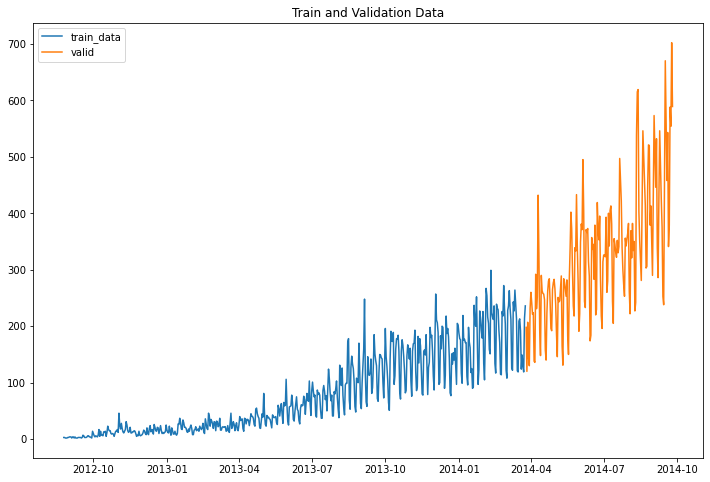

In [6]:
plt.figure(figsize=(12,8))
plt.plot(train_data.index, train_data['count'], label='train_data')
plt.plot(valid_data.index,valid_data['count'], label='valid')
plt.legend(loc='best')
plt.title("Train and Validation Data")
plt.show()

In [7]:
valid_data

,Date,count
Date,,
2014-03-26,2014-03-26,198
2014-03-27,2014-03-27,120
2014-03-28,2014-03-28,207
2014-03-29,2014-03-29,145
2014-03-30,2014-03-30,130
...,...,...
2014-09-21,2014-09-21,379
2014-09-22,2014-09-22,588
2014-09-23,2014-09-23,554


# Prophet

In [8]:
from prophet import Prophet

In [9]:
train_data.head()

,Date,count
Date,,
2012-08-25,2012-08-25,3
2012-08-26,2012-08-26,3
2012-08-27,2012-08-27,2
2012-08-28,2012-08-28,2
2012-08-29,2012-08-29,2


In [10]:
df = train_data[['Date', 'count']]

df.columns = ['ds','y']
df['ds'] = pd.to_datetime(df['ds'])

In [11]:
df.head()

,ds,y
Date,,
2012-08-25,2012-08-25,3
2012-08-26,2012-08-26,3
2012-08-27,2012-08-27,2
2012-08-28,2012-08-28,2
2012-08-29,2012-08-29,2


In [12]:
df.tail()

,ds,y
Date,,
2014-03-21,2014-03-21,149
2014-03-22,2014-03-22,129
2014-03-23,2014-03-23,119
2014-03-24,2014-03-24,214
2014-03-25,2014-03-25,236


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


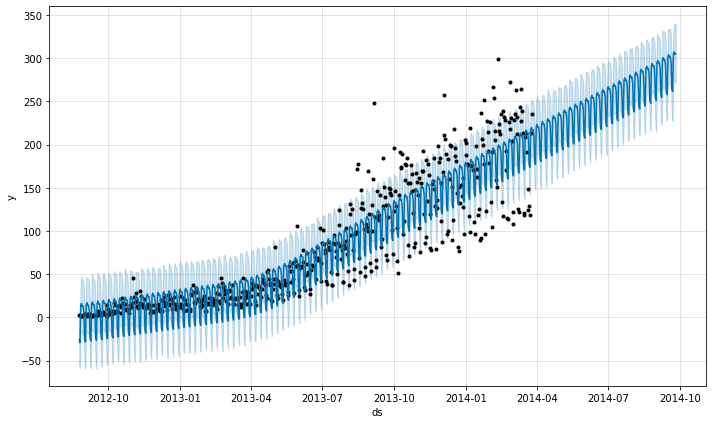

In [13]:
model = Prophet()
model.fit(df)
future = model.make_future_dataframe(periods=184,freq="D")
forecast = model.predict(future)
fig = model.plot(forecast)

In [14]:
train_data.shape, valid_data.shape

((578, 2), (184, 2))

In [15]:
len(forecast['yhat'][578:].values)

184

In [16]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2012-08-25,0.603119,-55.510982,4.034540,0.603119,0.603119,-26.347031,-26.347031,-26.347031,-26.347031,-26.347031,-26.347031,0.0,0.0,0.0,-25.743912
1,2012-08-26,0.734220,-58.033145,2.555072,0.734220,0.734220,-29.916526,-29.916526,-29.916526,-29.916526,-29.916526,-29.916526,0.0,0.0,0.0,-29.182306
2,2012-08-27,0.865322,-18.588517,43.895962,0.865322,0.865322,13.181040,13.181040,13.181040,13.181040,13.181040,13.181040,0.0,0.0,0.0,14.046361
3,2012-08-28,0.996423,-14.604872,48.151928,0.996423,0.996423,15.140848,15.140848,15.140848,15.140848,15.140848,15.140848,0.0,0.0,0.0,16.137271
4,2012-08-29,1.127524,-18.929749,40.626586,1.127524,1.127524,11.585777,11.585777,11.585777,11.585777,11.585777,11.585777,0.0,0.0,0.0,12.713301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,2014-09-21,291.290559,227.038115,291.156350,282.043521,299.916121,-29.916526,-29.916526,-29.916526,-29.916526,-29.916526,-29.916526,0.0,0.0,0.0,261.374033
758,2014-09-22,291.771398,274.463115,335.745275,282.443820,300.541114,13.181040,13.181040,13.181040,13.181040,13.181040,13.181040,0.0,0.0,0.0,304.952438
759,2014-09-23,292.252237,274.762879,339.968675,282.861032,301.153183,15.140848,15.140848,15.140848,15.140848,15.140848,15.140848,0.0,0.0,0.0,307.393085
760,2014-09-24,292.733077,270.885595,337.030861,283.284685,301.693165,11.585777,11.585777,11.585777,11.585777,11.585777,11.585777,0.0,0.0,0.0,304.318854


In [17]:
valid_data['prophet'] =  forecast['yhat'][578:].values

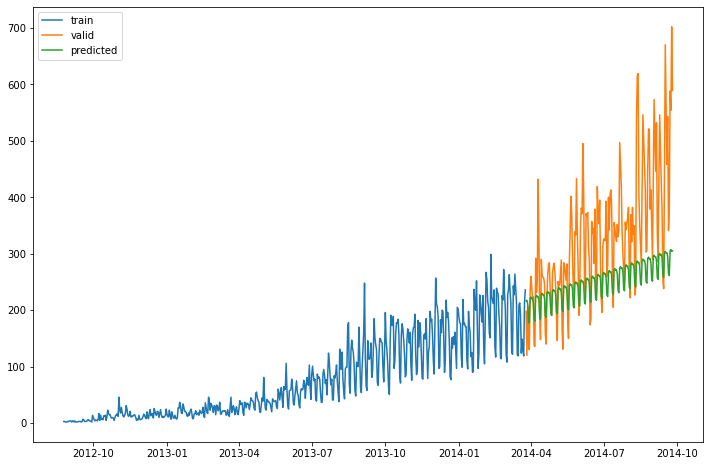

In [18]:
plt.figure(figsize=(12,8))

plt.plot(train_data['count'],  label='train') 
plt.plot(valid_data['count'],  label='valid') 
plt.plot(valid_data['prophet'],  label='predicted') 
plt.legend(loc='best') 
plt.show()

In [19]:
# calculating RMSLE 
rmsle = sqrt(mean_squared_log_error(valid_data['count'], valid_data['prophet']))
print('The RMSLE value for Prophet is', rmsle)

The RMSLE value for Prophet is 0.33055174423227834


In [20]:
valid_data

,Date,count,prophet
Date,,,
2014-03-26,2014-03-26,198,216.806131
2014-03-27,2014-03-27,120,217.530823
2014-03-28,2014-03-28,207,210.708295
2014-03-29,2014-03-29,145,180.315841
2014-03-30,2014-03-30,130,177.227184
...,...,...,...
2014-09-21,2014-09-21,379,261.374033
2014-09-22,2014-09-22,588,304.952438
2014-09-23,2014-09-23,554,307.393085


In [21]:
forecast.index= forecast.ds

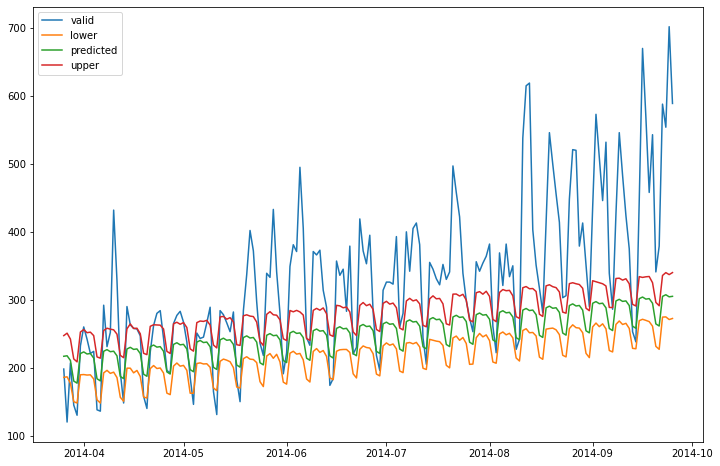

In [22]:
plt.figure(figsize=(12,8))

plt.plot(valid_data['count'],  label='valid') 
plt.plot(forecast['yhat_lower'][578:],  label='lower') 
plt.plot(forecast['yhat'][578:],  label='predicted') 
plt.plot(forecast['yhat_upper'][578:],  label='upper') 

plt.legend(loc='best') 
plt.show()

In [23]:
train_data = train_data.rename(columns={'Date':'ds', 'count':'y'})
train_data.head()

,ds,y
Date,,
2012-08-25,2012-08-25,3
2012-08-26,2012-08-26,3
2012-08-27,2012-08-27,2
2012-08-28,2012-08-28,2
2012-08-29,2012-08-29,2


In [24]:
valid_data = valid_data.rename(columns={'Date':'ds', 'count':'y'})
valid_data.head()

,ds,y,prophet
Date,,,
2014-03-26,2014-03-26,198,216.806131
2014-03-27,2014-03-27,120,217.530823
2014-03-28,2014-03-28,207,210.708295
2014-03-29,2014-03-29,145,180.315841
2014-03-30,2014-03-30,130,177.227184


# HyperParameter Tuning using ParameterGrid

In [25]:
from sklearn.model_selection import ParameterGrid
params_grid = {'seasonality_mode':('multiplicative','additive'),
                'changepoint_prior_scale':[0.08,0.25,0.15,0.1,0.2,0.3,0.4,0.5],
               'holidays_prior_scale':[0.1,0.2,0.3,0.4,0.5],
               'n_changepoints' : [100,150,200],
               'changepoint_range' : [0.85, 0.9]}
grid = ParameterGrid(params_grid)
cnt = 0
for p in grid:
               cnt = cnt+1

print('Total Possible Models',cnt)

Total Possible Models 480


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


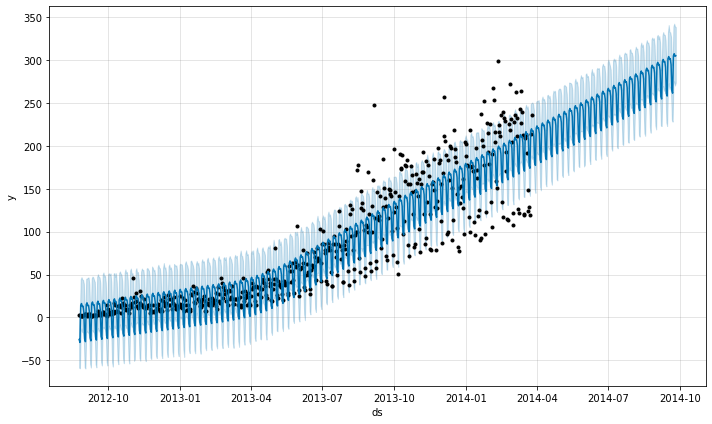

In [26]:
model = Prophet()
model.fit(df)
future = model.make_future_dataframe(periods=184,freq="D")
forecast = model.predict(future)
fig = model.plot(forecast)

In [27]:
valid_data['prophet'] =  forecast['yhat'][578:].values

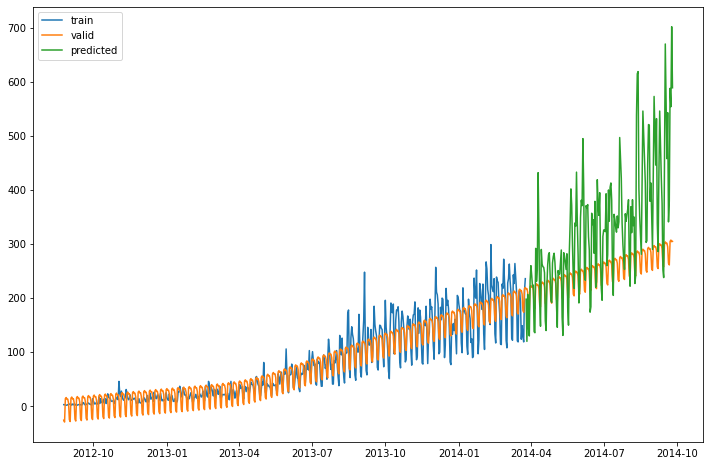

In [28]:
plt.figure(figsize=(12,8))

plt.plot(train_data['y'],  label='train') 
plt.plot(forecast['ds'], forecast['yhat'], label='valid') 
plt.plot(valid_data['y'],  label='predicted') 
plt.legend(loc='best') 
plt.show()

In [29]:
strt='2014-02-26'
end='2014-03-25'
model_parameters = pd.DataFrame(columns = ['RMSLE','Parameters'])
for p in grid:
    test = pd.DataFrame()
    print(p)
    #random.seed(0)
    train_model =Prophet(changepoint_prior_scale = 0.1,
                         holidays_prior_scale = p['holidays_prior_scale'],
                         n_changepoints = p['n_changepoints'],
                         seasonality_mode = p['seasonality_mode'],
                         weekly_seasonality=True,
                         daily_seasonality = True,
                         yearly_seasonality = True,
                        # holidays=holiday, 
                         interval_width=0.95)
    #train_model.add_country_holidays(country_name='US')
    train_model.fit(train_data)
    train_forecast = train_model.make_future_dataframe(periods=57, freq='M',include_history = True)
    train_forecast = train_model.predict(train_forecast)
    test=train_forecast[['ds','yhat']]
    Actual = df[(df['ds']>strt) & (df['ds']<=end)]
    RMSLE = sqrt(mean_squared_log_error(valid_data['y'], valid_data['prophet']))
    print('Root Mean Square Error(RMSLE)------------------------------------',RMSLE)
    model_parameters = model_parameters.append({'RMSLE':RMSLE,'Parameters':p},ignore_index=True)

INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


{'changepoint_prior_scale': 0.08, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.08, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'additive'}
Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.08, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.08, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


INFO:cmdstanpy:start chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.08, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.1, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.08, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.1, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.08, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.08, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'additive'}
Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.08, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.08, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


INFO:cmdstanpy:start chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.08, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.2, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.08, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.2, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.08, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.08, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'additive'}
Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


{'changepoint_prior_scale': 0.08, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.08, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


INFO:cmdstanpy:start chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.08, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.3, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.08, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.3, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.08, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.4, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.08, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.4, 'n_changepoints': 100, 'seasonality_mode': 'additive'}
Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


{'changepoint_prior_scale': 0.08, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.4, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}
Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.08, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.4, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


INFO:cmdstanpy:start chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.08, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.4, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.08, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.4, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.08, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.5, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.08, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.5, 'n_changepoints': 100, 'seasonality_mode': 'additive'}
Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


{'changepoint_prior_scale': 0.08, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.5, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.08, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.5, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


INFO:cmdstanpy:start chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.08, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.5, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.08, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.5, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.08, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.08, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'additive'}
Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.08, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.08, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


INFO:cmdstanpy:start chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.08, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.08, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.08, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.08, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'additive'}
Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.08, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.08, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


INFO:cmdstanpy:start chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.08, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.2, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.08, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.2, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.08, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.08, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'additive'}
Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.08, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.08, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


INFO:cmdstanpy:start chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.08, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.3, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.08, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.3, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.08, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.4, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.08, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.4, 'n_changepoints': 100, 'seasonality_mode': 'additive'}
Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.08, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.4, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.08, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.4, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


INFO:cmdstanpy:start chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.08, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.4, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.08, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.4, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.08, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.5, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.08, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.5, 'n_changepoints': 100, 'seasonality_mode': 'additive'}
Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.08, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.5, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.08, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.5, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


INFO:cmdstanpy:start chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.08, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.5, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.08, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.5, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.25, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.25, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'additive'}
Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.25, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.25, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


INFO:cmdstanpy:start chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.25, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.1, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.25, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.1, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.25, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.25, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'additive'}
Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.25, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.25, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


INFO:cmdstanpy:start chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.25, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.2, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.25, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.2, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.25, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.25, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'additive'}
Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.25, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.25, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


INFO:cmdstanpy:start chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.25, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.3, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.25, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.3, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.25, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.4, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.25, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.4, 'n_changepoints': 100, 'seasonality_mode': 'additive'}
Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.25, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.4, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.25, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.4, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


INFO:cmdstanpy:start chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.25, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.4, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.25, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.4, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.25, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.5, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.25, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.5, 'n_changepoints': 100, 'seasonality_mode': 'additive'}
Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.25, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.5, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.25, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.5, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


INFO:cmdstanpy:start chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.25, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.5, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.25, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.5, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.25, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.25, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'additive'}
Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.25, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.25, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


INFO:cmdstanpy:start chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.25, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.25, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.25, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.25, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'additive'}
Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.25, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.25, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


INFO:cmdstanpy:start chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.25, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.2, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.25, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.2, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.25, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.25, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'additive'}
Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.25, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.25, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


INFO:cmdstanpy:start chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.25, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.3, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.25, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.3, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.25, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.4, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.25, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.4, 'n_changepoints': 100, 'seasonality_mode': 'additive'}
Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.25, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.4, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.25, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.4, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


INFO:cmdstanpy:start chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.25, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.4, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.25, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.4, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.25, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.5, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.25, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.5, 'n_changepoints': 100, 'seasonality_mode': 'additive'}
Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.25, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.5, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.25, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.5, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


INFO:cmdstanpy:start chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.25, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.5, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.25, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.5, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.15, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.15, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'additive'}
Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.15, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.15, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


INFO:cmdstanpy:start chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.15, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.1, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.15, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.1, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.15, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.15, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'additive'}
Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.15, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.15, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


INFO:cmdstanpy:start chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.15, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.2, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.15, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.2, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.15, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.15, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'additive'}
Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.15, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.15, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


INFO:cmdstanpy:start chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.15, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.3, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.15, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.3, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.15, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.4, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.15, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.4, 'n_changepoints': 100, 'seasonality_mode': 'additive'}
Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.15, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.4, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.15, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.4, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


INFO:cmdstanpy:start chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.15, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.4, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.15, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.4, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.15, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.5, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.15, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.5, 'n_changepoints': 100, 'seasonality_mode': 'additive'}
Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.15, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.5, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.15, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.5, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


INFO:cmdstanpy:start chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.15, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.5, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.15, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.5, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.15, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.15, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'additive'}
Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.15, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.15, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


INFO:cmdstanpy:start chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.15, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.15, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.15, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.15, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'additive'}
Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.15, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.15, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


INFO:cmdstanpy:start chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.15, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.2, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.15, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.2, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.15, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.15, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'additive'}
Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.15, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.15, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


INFO:cmdstanpy:start chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.15, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.3, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.15, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.3, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.15, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.4, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.15, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.4, 'n_changepoints': 100, 'seasonality_mode': 'additive'}
Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.15, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.4, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.15, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.4, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


INFO:cmdstanpy:start chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.15, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.4, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.15, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.4, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.15, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.5, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.15, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.5, 'n_changepoints': 100, 'seasonality_mode': 'additive'}
Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.15, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.5, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.15, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.5, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


INFO:cmdstanpy:start chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.15, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.5, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.15, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.5, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.1, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.1, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'additive'}
Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.1, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.1, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


INFO:cmdstanpy:start chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.1, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.1, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.1, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.1, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.1, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.1, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'additive'}
Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.1, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.1, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


INFO:cmdstanpy:start chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.1, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.2, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.1, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.2, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.1, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.1, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'additive'}
Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.1, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.1, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


INFO:cmdstanpy:start chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.1, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.3, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.1, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.3, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.1, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.4, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.1, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.4, 'n_changepoints': 100, 'seasonality_mode': 'additive'}
Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.1, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.4, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.1, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.4, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


INFO:cmdstanpy:start chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.1, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.4, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.1, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.4, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.1, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.5, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.1, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.5, 'n_changepoints': 100, 'seasonality_mode': 'additive'}
Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.1, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.5, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.1, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.5, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


INFO:cmdstanpy:start chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.1, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.5, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.1, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.5, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'additive'}
Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


INFO:cmdstanpy:start chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'additive'}
Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


INFO:cmdstanpy:start chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.2, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.2, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'additive'}
Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


INFO:cmdstanpy:start chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.3, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.3, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.4, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.4, 'n_changepoints': 100, 'seasonality_mode': 'additive'}
Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.4, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.4, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


INFO:cmdstanpy:start chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.4, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.4, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.5, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.5, 'n_changepoints': 100, 'seasonality_mode': 'additive'}
Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.5, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.5, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


INFO:cmdstanpy:start chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.5, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.5, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.2, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.2, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'additive'}
Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.2, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.2, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


INFO:cmdstanpy:start chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.2, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.1, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.2, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.1, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.2, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.2, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'additive'}
Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


{'changepoint_prior_scale': 0.2, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}
Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.2, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


INFO:cmdstanpy:start chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.2, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.2, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.2, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.2, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.2, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.2, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'additive'}
Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.2, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.2, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


INFO:cmdstanpy:start chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.2, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.3, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.2, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.3, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.2, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.4, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.2, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.4, 'n_changepoints': 100, 'seasonality_mode': 'additive'}
Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.2, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.4, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.2, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.4, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


INFO:cmdstanpy:start chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.2, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.4, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.2, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.4, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.2, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.5, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.2, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.5, 'n_changepoints': 100, 'seasonality_mode': 'additive'}
Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.2, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.5, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.2, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.5, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


INFO:cmdstanpy:start chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.2, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.5, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.2, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.5, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.2, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.2, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'additive'}
Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.2, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.2, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


INFO:cmdstanpy:start chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.2, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.2, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.2, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.2, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'additive'}
Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.2, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.2, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


INFO:cmdstanpy:start chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.2, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.2, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.2, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.2, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.2, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.2, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'additive'}
Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.2, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.2, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


INFO:cmdstanpy:start chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.2, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.3, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.2, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.3, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.2, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.4, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.2, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.4, 'n_changepoints': 100, 'seasonality_mode': 'additive'}
Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.2, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.4, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.2, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.4, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


INFO:cmdstanpy:start chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.2, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.4, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.2, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.4, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.2, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.5, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.2, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.5, 'n_changepoints': 100, 'seasonality_mode': 'additive'}
Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.2, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.5, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.2, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.5, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


INFO:cmdstanpy:start chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.2, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.5, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.2, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.5, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.3, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.3, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'additive'}
Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.3, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.3, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


INFO:cmdstanpy:start chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.3, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.1, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.3, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.1, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.3, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.3, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'additive'}
Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.3, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.3, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


INFO:cmdstanpy:start chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.3, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.2, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.3, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.2, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.3, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.3, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'additive'}
Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.3, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.3, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


INFO:cmdstanpy:start chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.3, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.3, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.3, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.3, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.3, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.4, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.3, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.4, 'n_changepoints': 100, 'seasonality_mode': 'additive'}
Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


{'changepoint_prior_scale': 0.3, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.4, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:start chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.3, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.4, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.3, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.4, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.3, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.4, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.3, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.5, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.3, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.5, 'n_changepoints': 100, 'seasonality_mode': 'additive'}
Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.3, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.5, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.3, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.5, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


INFO:cmdstanpy:start chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.3, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.5, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.3, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.5, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.3, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.3, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'additive'}
Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.3, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.3, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


INFO:cmdstanpy:start chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.3, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.3, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.3, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.3, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'additive'}
Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.3, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.3, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


INFO:cmdstanpy:start chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.3, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.2, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.3, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.2, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.3, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.3, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'additive'}
Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


{'changepoint_prior_scale': 0.3, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.3, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


INFO:cmdstanpy:start chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.3, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.3, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.3, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.3, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.3, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.4, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.3, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.4, 'n_changepoints': 100, 'seasonality_mode': 'additive'}
Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.3, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.4, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.3, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.4, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


INFO:cmdstanpy:start chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.3, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.4, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.3, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.4, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.3, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.5, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.3, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.5, 'n_changepoints': 100, 'seasonality_mode': 'additive'}
Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.3, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.5, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.3, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.5, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


INFO:cmdstanpy:start chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.3, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.5, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.3, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.5, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.4, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.4, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'additive'}
Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.4, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.4, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


INFO:cmdstanpy:start chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.4, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.1, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.4, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.1, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.4, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.4, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'additive'}
Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.4, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.4, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


INFO:cmdstanpy:start chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.4, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.2, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.4, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.2, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.4, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.4, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'additive'}
Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.4, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.4, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


INFO:cmdstanpy:start chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.4, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.3, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.4, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.3, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.4, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.4, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.4, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.4, 'n_changepoints': 100, 'seasonality_mode': 'additive'}
Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.4, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.4, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.4, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.4, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


INFO:cmdstanpy:start chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.4, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.4, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.4, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.4, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.4, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.5, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.4, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.5, 'n_changepoints': 100, 'seasonality_mode': 'additive'}
Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.4, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.5, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.4, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.5, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


INFO:cmdstanpy:start chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.4, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.5, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.4, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.5, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.4, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.4, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'additive'}
Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.4, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.4, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


INFO:cmdstanpy:start chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.4, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.4, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.4, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.4, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'additive'}
Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.4, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.4, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


INFO:cmdstanpy:start chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.4, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.2, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.4, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.2, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.4, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.4, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'additive'}
Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.4, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.4, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


INFO:cmdstanpy:start chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.4, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.3, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.4, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.3, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.4, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.4, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.4, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.4, 'n_changepoints': 100, 'seasonality_mode': 'additive'}
Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.4, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.4, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.4, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.4, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


INFO:cmdstanpy:start chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.4, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.4, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.4, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.4, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.4, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.5, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.4, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.5, 'n_changepoints': 100, 'seasonality_mode': 'additive'}
Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.4, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.5, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.4, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.5, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


INFO:cmdstanpy:start chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.4, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.5, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.4, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.5, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.5, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.5, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'additive'}
Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.5, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.5, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


INFO:cmdstanpy:start chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.5, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.1, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.5, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.1, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.5, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.5, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'additive'}
Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.5, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.5, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


INFO:cmdstanpy:start chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.5, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.2, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.5, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.2, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.5, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.5, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'additive'}
Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.5, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.5, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


INFO:cmdstanpy:start chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.5, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.3, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.5, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.3, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.5, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.4, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.5, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.4, 'n_changepoints': 100, 'seasonality_mode': 'additive'}
Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.5, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.4, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.5, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.4, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


INFO:cmdstanpy:start chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.5, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.4, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.5, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.4, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.5, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.5, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.5, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.5, 'n_changepoints': 100, 'seasonality_mode': 'additive'}
Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.5, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.5, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.5, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.5, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


INFO:cmdstanpy:start chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.5, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.5, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.5, 'changepoint_range': 0.85, 'holidays_prior_scale': 0.5, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.5, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.5, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'additive'}
Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.5, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.5, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


INFO:cmdstanpy:start chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.5, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.5, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.5, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.5, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'additive'}
Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.5, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.5, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


INFO:cmdstanpy:start chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.5, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.2, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.5, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.2, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.5, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.5, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'additive'}
Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.5, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.5, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


INFO:cmdstanpy:start chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.5, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.3, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.5, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.3, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.5, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.4, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.5, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.4, 'n_changepoints': 100, 'seasonality_mode': 'additive'}
Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.5, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.4, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.5, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.4, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


INFO:cmdstanpy:start chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.5, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.4, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.5, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.4, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.5, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.5, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.5, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.5, 'n_changepoints': 100, 'seasonality_mode': 'additive'}
Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.5, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.5, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.5, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.5, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


INFO:cmdstanpy:start chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.5, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.5, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834
{'changepoint_prior_scale': 0.5, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.5, 'n_changepoints': 200, 'seasonality_mode': 'additive'}
Root Mean Square Error(RMSLE)------------------------------------ 0.33055174423227834


In [30]:
parameters = model_parameters.sort_values(by=['RMSLE'])
parameters = parameters.reset_index(drop=True)
parameters.head()

,RMSLE,Parameters
0,0.330552,"{'changepoint_prior_scale': 0.08, 'changepoint..."
1,0.330552,"{'changepoint_prior_scale': 0.3, 'changepoint_..."
2,0.330552,"{'changepoint_prior_scale': 0.3, 'changepoint_..."
3,0.330552,"{'changepoint_prior_scale': 0.3, 'changepoint_..."
4,0.330552,"{'changepoint_prior_scale': 0.3, 'changepoint_..."


In [31]:
parameters['Parameters'][1]

{'changepoint_prior_scale': 0.3,
 'changepoint_range': 0.85,
 'holidays_prior_scale': 0.5,
 'n_changepoints': 150,
 'seasonality_mode': 'additive'}

In [32]:
# Setup and train model with holidays
final_model = Prophet(#holidays=holiday,
                      changepoint_prior_scale= 0.3,
                        changepoint_range = 0.85,
                      holidays_prior_scale = 0.5,
                      n_changepoints = 150,
                      seasonality_mode = 'additive',
                      weekly_seasonality=True,
                      daily_seasonality = True,
                      yearly_seasonality = True,
                      interval_width=0.95)
#final_model.add_country_holidays(country_name='US')
final_model.fit(train_data)

INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


In [33]:
future2 = final_model.make_future_dataframe(periods=184, freq='D')
forecast2 = final_model.predict(future2)
forecast2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
755,2014-09-19,314.387333,269.035078,360.810069
756,2014-09-20,283.977936,233.551055,325.116083
757,2014-09-21,280.881984,234.934169,326.942025
758,2014-09-22,324.461640,276.893991,372.129574
759,2014-09-23,326.926044,279.405760,372.895570
760,2014-09-24,323.665535,278.148091,367.916432
761,2014-09-25,324.463960,276.602423,366.590804


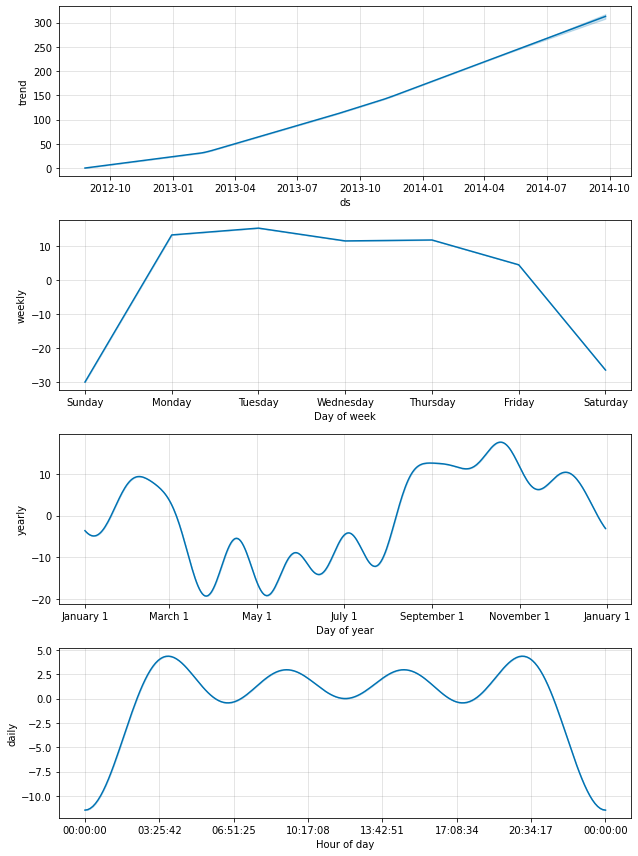

In [34]:
# Plot the components of the model
fig = final_model.plot_components(forecast2)

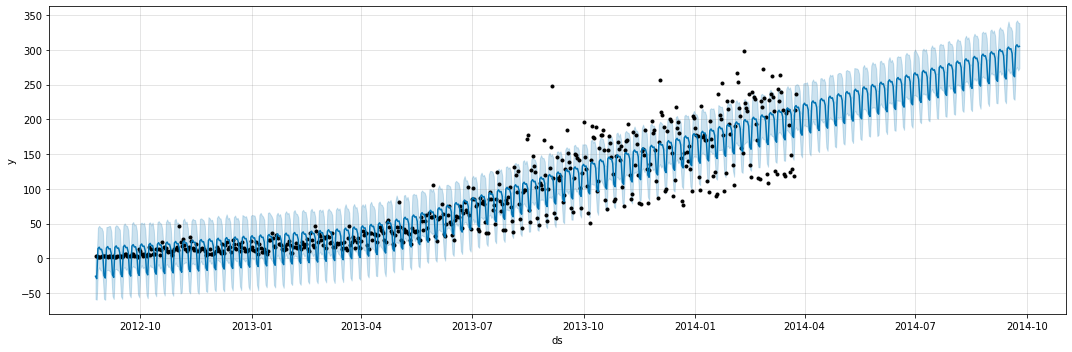

In [35]:
# Plot the forecast
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
fig = final_model.plot(forecast,ax=ax)
plt.show()

In [36]:
end_date = '2014-01-26'
mask1 = (df['ds'] <= end_date)
mask2 = (df['ds'] > end_date)

In [37]:
X_tst = train_data.loc[mask2]
print("test shape",X_tst.shape)

test shape (58, 2)


In [38]:
valid_data

,ds,y,prophet
Date,,,
2014-03-26,2014-03-26,198,216.806131
2014-03-27,2014-03-27,120,217.530823
2014-03-28,2014-03-28,207,210.708295
2014-03-29,2014-03-29,145,180.315841
2014-03-30,2014-03-30,130,177.227184
...,...,...,...
2014-09-21,2014-09-21,379,261.374033
2014-09-22,2014-09-22,588,304.952438
2014-09-23,2014-09-23,554,307.393085


In [39]:
X_tst_final= final_model.predict(X_tst)
X_tst_final[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2014-01-27,192.679241,146.079859,239.225829
1,2014-01-28,195.830148,150.340631,238.850607
2,2014-01-29,193.189667,147.724785,241.520084
3,2014-01-30,194.531897,146.589603,239.503003
4,2014-01-31,188.271900,139.086448,236.015880
5,2014-02-01,158.385767,111.782382,201.162407
6,2014-02-02,155.745402,108.945069,203.202783
7,2014-02-03,199.707559,154.749115,250.918088
8,2014-02-04,202.476892,155.126015,246.599872
9,2014-02-05,199.440271,155.457969,245.153522


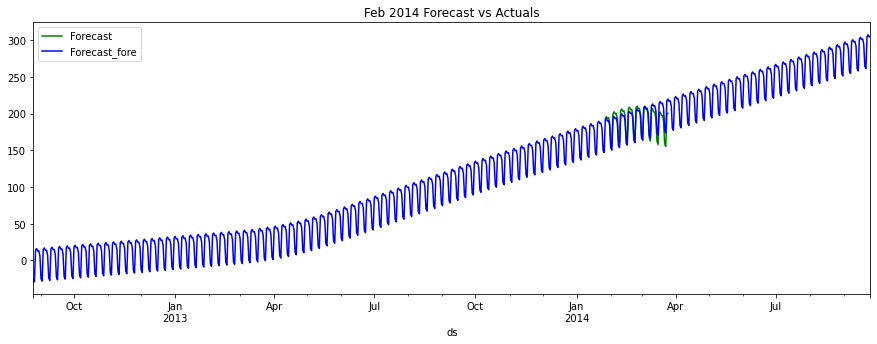

In [40]:
f, ax = plt.subplots(figsize=(14,5))
f.set_figheight(5)
f.set_figwidth(15)
X_tst_final.plot(kind='line',x='ds',y='yhat', color='green',label='Forecast', ax=ax)
forecast.plot(kind='line',x='ds',y='yhat', color='blue',label='Forecast_fore', ax=ax)
plt.title('Feb 2014 Forecast vs Actuals')
plt.show()

In [42]:
sqrt(mean_squared_log_error(X_tst_final['yhat'], forecast['yhat'][520:578]))

0.04465309976315982

In [43]:
forecast.shape

(762, 16)

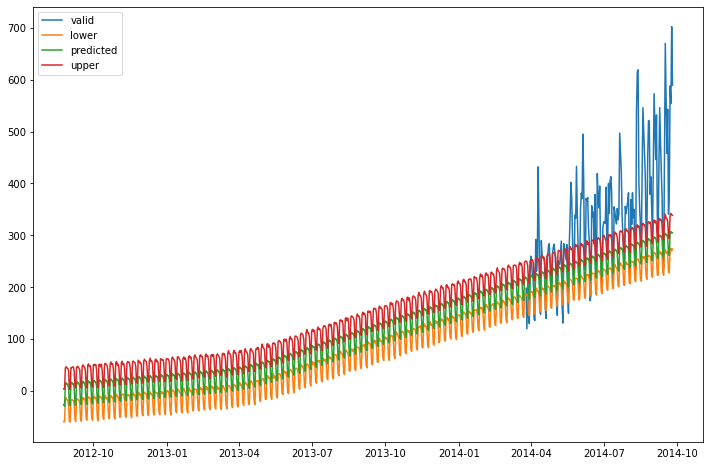

In [44]:
plt.figure(figsize=(12,8))

plt.plot(valid_data['y'],  label='valid') 
plt.plot(forecast['ds'],forecast['yhat_lower'],  label='lower') 
plt.plot(forecast['ds'],forecast['yhat'],  label='predicted') 
plt.plot(forecast['ds'],forecast['yhat_upper'],  label='upper') 

plt.legend(loc='best') 
plt.show()

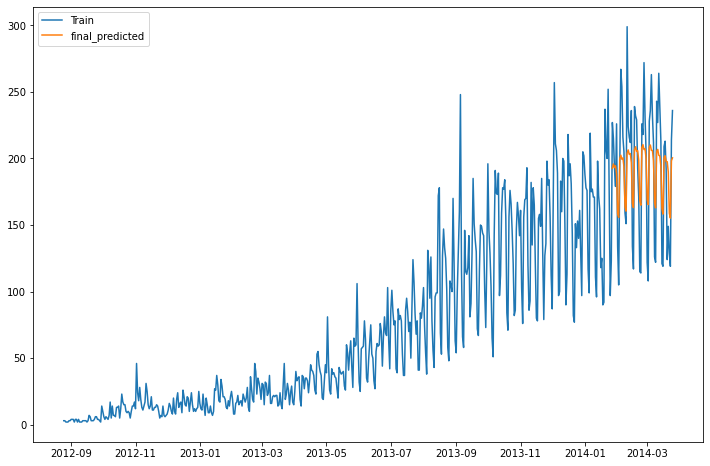

In [45]:
plt.figure(figsize=(12,8))
plt.plot(train_data['y'],  label='Train') 
plt.plot(X_tst_final['ds'],X_tst_final['yhat'],  label='final_predicted') 
plt.legend(loc='best') 
plt.show()

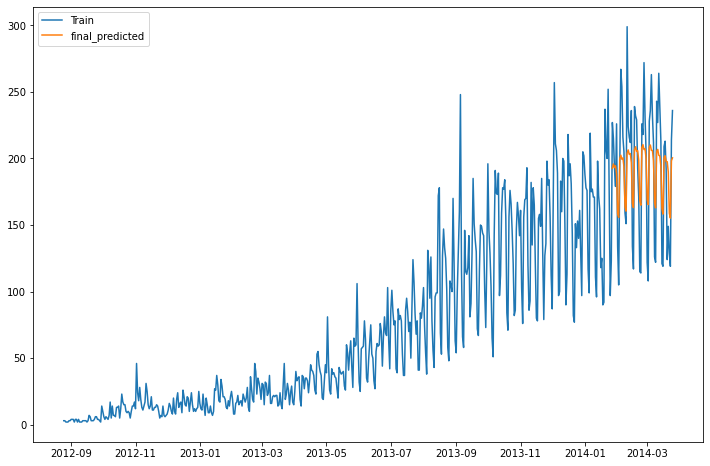

In [46]:
plt.figure(figsize=(12,8))
plt.plot(train_data['y'],  label='Train') 
plt.plot(X_tst_final['ds'],X_tst_final['yhat'],  label='final_predicted') 
plt.legend(loc='best') 
plt.show()

In [47]:
final_pred = final_model.predict(valid_data)

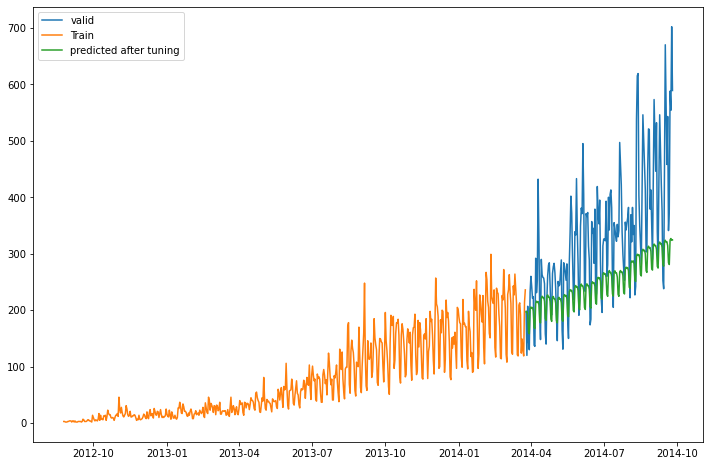

In [48]:
plt.figure(figsize=(12,8))
 
plt.plot(valid_data['y'],  label='valid') 
plt.plot(train_data['y'],  label='Train') 
plt.plot(final_pred['ds'],final_pred['yhat'],  label='predicted after tuning') 

plt.legend(loc='best') 
plt.show()

In [49]:
rmsle_final = sqrt(mean_squared_log_error(valid_data['prophet'], final_pred['yhat']))
print('The RMSLE value for Prophet after tuning is', rmsle_final)

The RMSLE value for Prophet after tuning is 0.05115506930421122


# Making predictions for seven months

In [50]:
preds_future = final_model.make_future_dataframe(periods=213)

In [51]:
forecast_seven_months = final_model.predict(preds_future)

forecast_seven_months[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2012-08-25,-25.238523,-72.469651,21.335458
1,2012-08-26,-28.508160,-74.388036,16.144261
2,2012-08-27,14.856998,-29.530547,58.031892
3,2012-08-28,17.067135,-27.215320,60.230308
4,2012-08-29,13.512988,-29.843716,56.220281
...,...,...,...,...
786,2014-10-20,345.518097,300.320725,392.178578
787,2014-10-21,347.913956,302.132981,396.311321
788,2014-10-22,344.484487,299.502862,388.031041
789,2014-10-23,345.010274,299.980826,391.308365


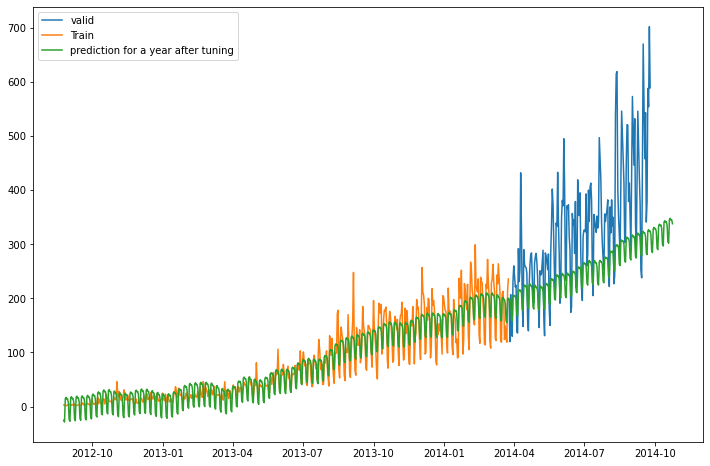

In [52]:
plt.figure(figsize=(12,8))
plt.plot(valid_data['y'],  label='valid') 
plt.plot(train_data['y'],  label='Train') 
plt.plot(forecast_seven_months['ds'],forecast_seven_months['yhat'],  label='prediction for a year after tuning') 
plt.legend(loc='best') 
plt.show()

Further steps:

1. Forecast growth by using growth = 'logistic' in prophet while building model and then perform hyper parameter tuning
2. Remove outliers and predict with prophet
3. Implement automatic changepoint detection using Prophet